### О ЛР:

- Coding Gradient boosting

----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку (Она тут равняется 6).

**Оценка**:

***DeadLine - 28.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.

In [5]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style="darkgrid")
filterwarnings("ignore")

In [6]:
x = load_npz("x.npz")
y = np.load("y.npy")

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 666 для воспроизводимости).

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=666
)

x_test, x_valid, y_test, y_valid = train_test_split(
    x_test, y_test, test_size=0.5, random_state=666
)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга [2 балла]

Необходимо дописать код в файле `boosting.py`. Уже создан шаблон класса `Boosting`, который можно модифицировать по своему усмотрению.

### Описание функций:

#### `__init__`

Конструктор класса принимает следующие параметры:

- `base_model_class` — класс базовой модели для бустинга.
- `base_model_params` — словарь гиперпараметров для базовой модели.
- `n_estimators` — количество базовых моделей для обучения.
- `learning_rate` — темп обучения, должен быть в диапазоне (0, 1].
- `subsample` — доля обучающей выборки для тренировки базовой модели (размер бутстрап-выборки относительно исходной).
- `early_stopping_rounds` — число итераций без улучшения на валидационной выборке, после которых обучение прекращается.
- `plot` — флаг для построения графика качества моделей после обучения.

#### `fit`

Метод `fit` принимает обучающую и валидационную выборки.

1. Инициализируем нулевую модель и делаем предсказания (например, все нули) для обеих выборок.
2. Обучаем `n_estimators` базовых моделей:
   - Обучаем новую базовую модель на текущих остатках.
   - Обновляем предсказания на обучающей и валидационной выборках.
   - Рассчитываем ошибки на обеих выборках с помощью `loss_fn`.
   - Проверяем условия для ранней остановки.

3. Если флаг `plot` установлен, строим график качества после обучения всех моделей.

#### `fit_new_base_model`

Метод `fit_new_base_model` принимает обучающую выборку и текущие предсказания для неё.

1. Генерируем бутстрап-выборку.
2. Обучаем базовую модель на этой выборке.
3. Оптимизируем значение гаммы.
4. Добавляем новую базовую модель и гамму в соответствующие списки (учитывая `learning_rate`).

#### `predict_proba`

Метод `predict_proba` принимает выборку для предсказания вероятностей.

1. Суммируем предсказания базовых моделей (учитывая гамму и `learning_rate`).
2. Применяем сигмоидальную функцию для получения вероятностей.

In [14]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [27]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators
assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 1.24 s, sys: 1.8 ms, total: 1.24 s
Wall time: 1.24 s
Train ROC-AUC 0.9858
Valid ROC-AUC 0.9541
Test ROC-AUC 0.9501


## Задание 2. Обучение градиентного бустинга [0.5 балла]

Оцените качество вашей реализации градиентного бустинга на тестовой выборке, используя базовые модели — решающие деревья с различной максимальной глубиной. Метрикой будет ROC-AUC.

**Инструкция:**
1. Перебирайте значения максимальной глубины деревьев от 1 до 30 с шагом 2.
2. Оставьте остальные параметры бустинга по умолчанию.
3. Постройте график зависимости качества на обучающей и тестовой выборке от максимальной глубины деревьев.

    max_depth  train_roc_auc  test_roc_auc
0           1       0.844613      0.844351
1           3       0.933608      0.929676
2           5       0.950629      0.946401
3           7       0.961932      0.952492
4           9       0.969551      0.955894
5          11       0.974009      0.953752
6          13       0.978276      0.957356
7          15       0.981162      0.952787
8          17       0.983403      0.946664
9          19       0.984136      0.952710
10         21       0.985086      0.947654
11         23       0.985042      0.950633
12         25       0.984871      0.951308
13         27       0.985918      0.949951
14         29       0.985961      0.946878


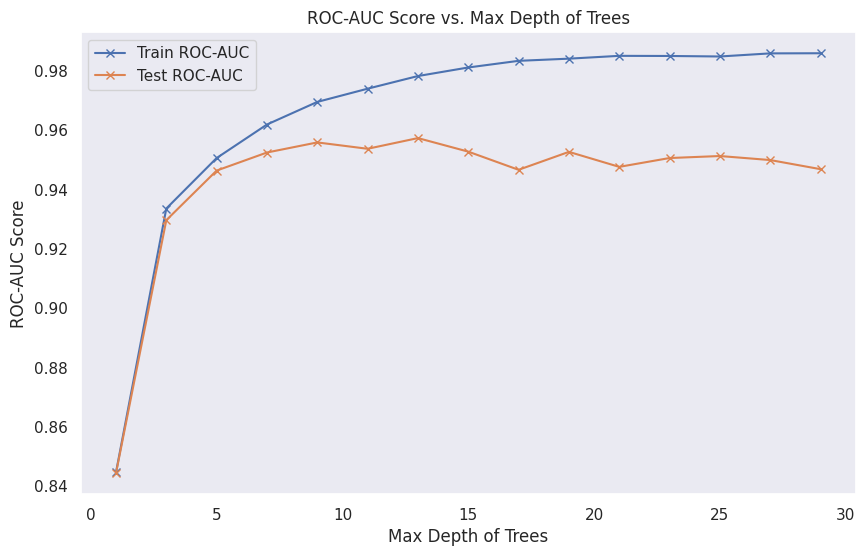

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

depths = range(1, 30, 2)
results = {'max_depth': [], 'train_roc_auc': [], 'test_roc_auc': []}

for depth in depths:
    boosting = Boosting(base_model_params={'max_depth': depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)

    train_score = boosting.score(x_train, y_train)
    test_score = boosting.score(x_test, y_test)
    results['max_depth'].append(depth)
    results['train_roc_auc'].append(train_score)
    results['test_roc_auc'].append(test_score)

results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(10, 6))
plt.plot(results_df['max_depth'], results_df['train_roc_auc'], label='Train ROC-AUC', marker='x')
plt.plot(results_df['max_depth'], results_df['test_roc_auc'], label='Test ROC-AUC', marker='x')
plt.xlabel('Max Depth of Trees')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Score vs. Max Depth of Trees')
plt.legend()
plt.grid()
plt.show()


**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Наилучший результат roc_auc на тестовой выборке показывает модель при глубине деревьев 13. Слишком большая глубина деревьев может привести к переобучению

## Задание 3. Подбор гиперпараметров и поиск оптимальной модели [3 балла]

Настройте основные гиперпараметры вашей модели градиентного бустинга, используя валидационную выборку. Подберите параметры как для самого бустинга, так и для базовых моделей.

**Рекомендации:**
- Используйте библиотеки для автоматизированного подбора гиперпараметров, такие как [Hyperopt](https://github.com/hyperopt/hyperopt) или [Optuna](https://optuna.org/).
- Подберите все основные параметры, чтобы найти лучшую модель на валидационной выборке.

In [31]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


In [32]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    max_depth = trial.suggest_int('max_depth', 1, 30)

    boosting = Boosting(
        base_model_params={'max_depth': max_depth},
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample
    )
    boosting.fit(x_train, y_train, x_valid, y_valid)

    valid_score = boosting.score(x_valid, y_valid)

    return valid_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_score = study.best_value

print("Best parameters: ", best_params)
print("Best validation score: ", best_score)

[I 2024-09-19 22:29:01,271] A new study created in memory with name: no-name-08c1a2ec-13c8-4233-bec7-c1045ad8da6f
[I 2024-09-19 22:29:23,362] Trial 0 finished with value: 0.9565453789811224 and parameters: {'n_estimators': 73, 'learning_rate': 0.06888763501025039, 'subsample': 0.7455563847574684, 'max_depth': 22}. Best is trial 0 with value: 0.9565453789811224.
[I 2024-09-19 22:29:45,878] Trial 1 finished with value: 0.9596963423050379 and parameters: {'n_estimators': 91, 'learning_rate': 0.18169663241799056, 'subsample': 0.7720838157149779, 'max_depth': 16}. Best is trial 1 with value: 0.9596963423050379.
[I 2024-09-19 22:30:03,346] Trial 2 finished with value: 0.9546042422093347 and parameters: {'n_estimators': 58, 'learning_rate': 0.12415177500832841, 'subsample': 0.7076194303692491, 'max_depth': 26}. Best is trial 1 with value: 0.9596963423050379.
[I 2024-09-19 22:30:06,561] Trial 3 finished with value: 0.9109566895058128 and parameters: {'n_estimators': 52, 'learning_rate': 0.0568

Best parameters:  {'n_estimators': 46, 'learning_rate': 0.08641857080821932, 'subsample': 0.7450162693743405, 'max_depth': 12}
Best validation score:  0.9627149987226854


## Задание 4. Интерпретация градиентного бустинга [1 балл]

Постройте калибровочную кривую для вашей лучшей модели градиентного бустинга и оцените, насколько точно модель предсказывает вероятности.

**Инструкция:**
1. Постройте калибровочную кривую для лучшей модели градиентного бустинга.
2. Постройте аналогичную кривую для логистической регрессии.
3. Сравните полученные результаты и проанализируйте, насколько хорошо каждая модель оценивает вероятности.

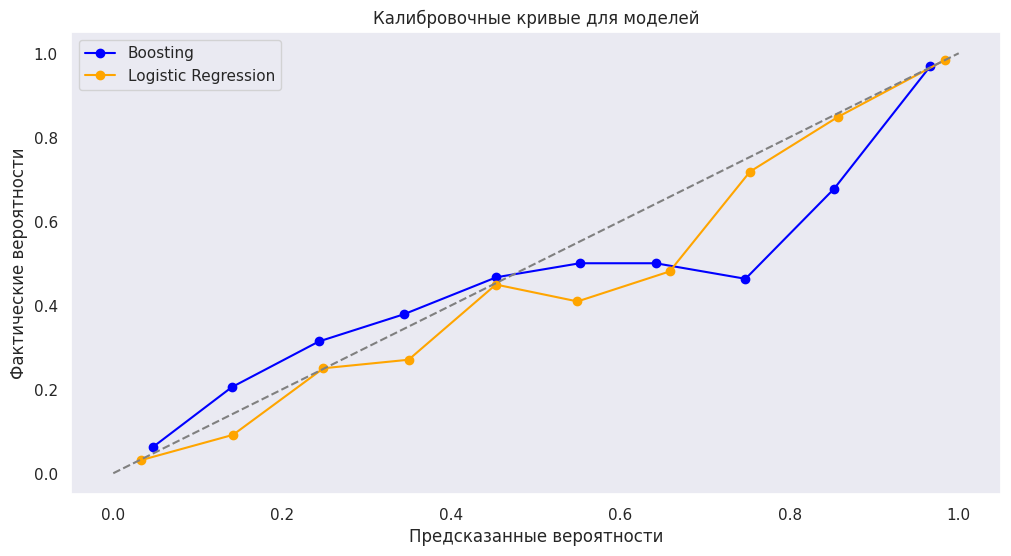

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
best_boosting = Boosting(
    base_model_params={'max_depth': best_params['max_depth']},
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample']
)
best_boosting.fit(x_train, y_train, x_valid, y_valid)

probs_boosting = best_boosting.predict_proba(x_valid)[:, 1]

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

probs_logistic = logistic_model.predict_proba(x_valid)[:, 1]

plt.figure(figsize=(12, 6))

prob_true_boosting, prob_pred_boosting = calibration_curve(y_valid, probs_boosting, n_bins=10)
plt.plot(prob_pred_boosting, prob_true_boosting, marker='o', label='Boosting', color='blue')

prob_true_logistic, prob_pred_logistic = calibration_curve(y_valid, probs_logistic, n_bins=10)
plt.plot(prob_pred_logistic, prob_true_logistic, marker='o', label='Logistic Regression', color='orange')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Предсказанные вероятности')
plt.ylabel('Фактические вероятности')
plt.title('Калибровочные кривые для моделей')
plt.legend()
plt.grid()
plt.show()

Теперь оценим важность признаков для градиентного бустинга.

**Задание:**
1. Поскольку базовая модель — дерево из `sklearn`, вычислите важность каждого признака для каждого дерева, используя атрибут `feature_importances_` у `DecisionTreeRegressor`.
2. Усредните значения важности по всем деревьям и нормализуйте их так, чтобы сумма была равна единице (убедитесь, что значения неотрицательны).
3. Дополните вашу реализацию бустинга, добавив метод `feature_importances_`, который будет возвращать усредненные и нормализованные важности признаков.

**Построение графиков:**
1. Постройте столбчатую диаграмму важности признаков для градиентного бустинга.
2. На соседнем графике изобразите важность признаков для логистической регрессии, используя модули весов.
3. Сравните графики и проанализируйте полученные результаты.

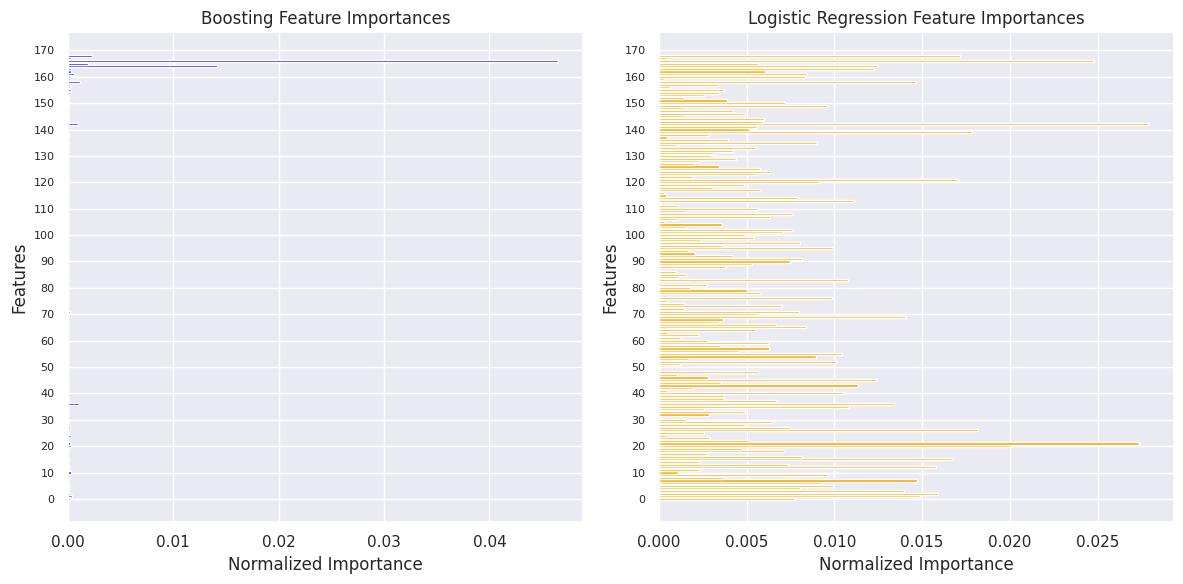

In [61]:
boosting_importances = best_boosting.feature_importances_

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

logistic_importances = logistic_model.coef_[0]
logistic_importances = np.abs(logistic_importances)
logistic_importances /= np.sum(logistic_importances)

feature_names = [f'Feature {i}' for i in range(x_train.shape[1])]
df_importances = pd.DataFrame({
    'Feature': feature_names,
    'Boosting Importances': boosting_importances,
    'Logistic Importances': logistic_importances
})

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(df_importances['Feature'], df_importances['Boosting Importances'], color='blue')
plt.title('Boosting Feature Importances')
plt.xlabel('Normalized Importance')
plt.yticks(ticks=np.arange(0, 180, 10),
           labels=np.arange(0, 180, 10), fontsize=8)
plt.ylabel('Features')

plt.subplot(1, 2, 2)
plt.barh(df_importances['Feature'], df_importances['Logistic Importances'], color='orange')
plt.title('Logistic Regression Feature Importances')
plt.xlabel('Normalized Importance')
plt.yticks(ticks=np.arange(0, 180, 10),
           labels=np.arange(0, 180, 10), fontsize=8)
plt.ylabel('Features')

plt.tight_layout()
plt.show()

Обычно избыточные признаки могут негативно влиять на качество бустинга. Попробуйте следующее:

1. **Отфильтруйте неважные признаки:** Используйте построенную диаграмму важности признаков, чтобы отобрать наиболее незначительные признаки.
2. **Обучите модель повторно:** Обучите модель на основе оставшихся признаков с теми же гиперпараметрами.
3. **Оцените качество модели:** Сравните результаты новой модели с исходной. Улучшилось ли качество после отфильтровывания незначительных признаков?

In [63]:
boosting_importances = best_boosting.feature_importances_

importance_threshold = 0.01
important_features = np.where(boosting_importances > importance_threshold)[0]

x_train_filtered = x_train[:, important_features]
x_valid_filtered = x_valid[:, important_features]
x_test_filtered = x_test[:, important_features]

filtered_boosting = Boosting(
    base_model_params={'max_depth': best_params['max_depth']},
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample']
)
filtered_boosting.fit(x_train_filtered, y_train, x_valid_filtered, y_valid)

train_roc_auc_filtered = filtered_boosting.score(x_train_filtered, y_train)
valid_roc_auc_filtered = filtered_boosting.score(x_valid_filtered, y_valid)
test_roc_auc_filtered = filtered_boosting.score(x_test_filtered, y_test)


print(f"Test ROC-AUC (Filtered): {test_roc_auc_filtered:.4f}")

print(f"Test ROC-AUC (Original): {best_boosting.score(x_test, y_test):.4f}")


Test ROC-AUC (Filtered): 0.9257
Test ROC-AUC (Original): 0.9592


После фильтрации есть небольшое ухудшение ROC-AUC, что говорит о том, что даже малозначительные признаки нужно учитывать при обучении для улучшения результата.

## Задание 5 (бонус). Блендинговое [0.5 балла]

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 6 (бонус). Катбустовое [0.5 балла]

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Оставьте пожалуйста отзыв о курсе!

https://forms.gle/LajA3Xrps6u96Q5A8


Это очень важно. Благодаря обратной связи мы будем двигаться в сторону антиградиента)
